In [2]:
import scipy.stats

In [5]:
scipy.stats.norm.cdf(0)

0.5

In [6]:
mean = 9.5

In [7]:
std = 0.4

In [8]:
n=140

In [10]:
x=9.57

In [11]:
scipy.stats.norm.cdf(x, mean, std/n**0.5)

0.9808032097314456

In [14]:
2*(1-scipy.stats.norm.cdf(x, mean, std/n**0.5))

0.03839358053710873

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\javasdk\anakonda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('diamonds.txt', sep='\t')

In [18]:
df.head(1)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43


In [20]:
import sklearn

In [21]:
y = df.price

In [23]:
X = df.drop('price', axis=1)

In [25]:
X.head()


,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [27]:
from sklearn.cross_validation import train_test_split

In [34]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
from  sklearn.linear_model import LinearRegression
from  sklearn.ensemble import RandomForestRegressor

In [36]:
clf1 = LinearRegression()

In [38]:
clf1.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_predict_1 = clf1.predict(test_x)

In [41]:
clf2 = RandomForestRegressor(random_state=1)


In [43]:
clf2.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [44]:
y_predict_2 = clf2.predict(test_x)

In [46]:
y_d1 = np.abs(y_predict_1-test_y)

In [48]:
y_d2 = np.abs(y_predict_2-test_y)

In [49]:
from statsmodels.stats.weightstats import *

In [50]:
stats.ttest_rel(y_d1, y_d2)

Ttest_relResult(statistic=12.930817614948877, pvalue=5.074175575653556e-38)

In [54]:
"95%% confidence interval: [%f, %f]" % DescrStatsW(y_d1 - y_d2).tconfint_mean()

'95% confidence interval: [73.610088, 99.914037]'

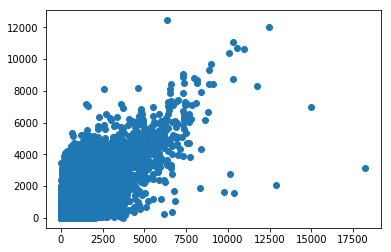

In [57]:
plt.scatter(y_d1, y_d2)

In [65]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [71]:
def proportions_diff_z_stat_ind(n1, n2, p1, p2):

    P = float(p1*n1 + p2*n2) / (n1 + n2)
    print(P)
    return (p1 - p2) / (P * (1 - P) * (1. / n1 + 1. / n2))**0.5

In [67]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [75]:
proportions_diff_z_stat_ind( 34, 16, 10/34, 4/16)

0.28


0.32410186177608225

In [78]:
proportions_diff_z_test(proportions_diff_z_stat_ind( 34, 16, 10/34, 4/16), 'greater')

0.28


0.37293045872523534